<h1 id="-top">Getting started with sealeveltools </h1>

Exploit geophyiscal data in ND. 
Time and space operators.
<div style="height:20px;"></div>

- [// The sl()-class -  core data structures](#-sl()-class)
- [// Plotting and Visualization](#-plotting-and-visualization)
- [// Operators](#-Operators)
- [// Spatial manipulations](#-Spatial-manipulations)
- [// Time operators](#-Time-operators)
- [// Custom functions, miscellaneous](#-Custom-functions)


<div style="height:20px;"></div>





General information:

Data-organization is heavily based on xarray (or pandas), which introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like multidimensional arrays. Xarray offers a variety of mathemtical operators, which we exploit and complement with the functionalities integrated in sea_level_tool.


<b id="-sl()-class">The sl-class</b> <a href="#-top">[back to top]</a>


This class adds a library of functions to a xarray or pandas-like data-types. It is designed to allow an user friendly handling of the data. sl()-class automatically recognises properties (variables, dimensions) of the input arrays to easier combine different data-set and to apply operations on the data in a modular way. 


#### General Information

sl() accepts several data-types as input. These are:

- floats
- pd.DataFrame
- pd.Series
- xr.DataSet
- xr.DataArray
- lists of xr.DataSet or xr.DataArray
***
!! Notes !!

Naming convention of coordinates and dimensions:

- if you have a time dimension in xr.*: dimension/coordinate name: 'time' (must be first dimension)
- if you have a time dimension in pd.*: index-datatype: must pd.DatetimeIndex (naming does'nt matter)
- if you have spatial dimensions in xr.*: 
    * for unstructured data: abstract dimension name 'x', coords: 'lon', 'lat' (order does'nt matter)
    * for structured data: both dimension and coords: 'lon','lat' (order does'nt matter)

if you don't specify a variable to be manipulated among many variables in an xr.DataSet, the first variable is selected. Most functions do not apply operations on all variables at once!!!

Both issues will be addressed soon!

!! Notes end !!
***
The sl() class is imported with

In [4]:
from sealeveltools.sl_class import sl

We load some test xr or pd data for the following examples:
(They are not included in the package per default)

In [2]:
from sealeveltools.sl_utils import *
sat,tg,gnss,gia,ci = load_testfiles()

Methods contained in the sl() class, can be applied to the data with

In [ ]:
sl(sat).*method()

The original data is stored in sl().data so any built-in pandas/xarray functions can still be applied to sl().data.
The sl-class contains a number of methods an attributes which can be applied to the listed kind of data. In this way the sl-class acts like a wrapper function as it extends xr-functionalities. The focus of the package is primarily on statistical anaylsis, the streamlined combination of structured and unstructured data (in time and space) as well as on simple visualisation.

e.g.

In [33]:
sat

<xarray.Dataset>
Dimensions:             (time: 289, x: 12844)
Coordinates:
    lon                 (x) float64 7.029 5.129 4.985 ... -0.05653 0.05653
    lat                 (x) float64 60.97 60.93 60.94 ... 50.04 50.04 50.04
  * time                (time) datetime64[ns] 1995-05-31 ... 2019-05-31
Dimensions without coordinates: x
Data variables:
    ssh                 (time, x) float64 0.08464 -0.1384 ... -0.1006 -0.106
    ssh_std             (time, x) float64 ...
    sig0_fitting_error  (time, x) float64 ...
    num_used_obs        (time, x) float64 ...
    num_obs             (time, x) float64 ...
    mean_time_obs       (time, x) float64 ...

is the same as

In [4]:
sl(sat).data

<xarray.Dataset>
Dimensions:             (time: 289, x: 12844)
Coordinates:
    lon                 (x) float64 ...
    lat                 (x) float64 ...
  * time                (time) datetime64[ns] 1995-05-31 ... 2019-05-31
Dimensions without coordinates: x
Data variables:
    ssh                 (time, x) float64 0.08464 -0.1384 ... -0.1006 -0.106
    ssh_std             (time, x) float64 ...
    sig0_fitting_error  (time, x) float64 ...
    num_used_obs        (time, x) float64 ...
    num_obs             (time, x) float64 ...
    mean_time_obs       (time, x) float64 ...

### <b id="-plotting-and-visualization">Plotting and visualization</b> <a href="#top">[back to top]</a>


We can directly plot an array with sl().plot(). sl().plot() accepts some more specifications such as

- var: list of variables in data, 'all_' to plot all variables in dataset
- time: list of time-steps to plot
- ranges: list of [vmin,vmax] values of plotted data-range
- units: list of units
- extend: lon, lat domain [lonmin,lonmax,latmin,latmax]
- save: bool (save figure)
- save_dir: save-directory
- save_name: save-directory
- land,river: bool (plot land or rivers)
- cmap: specify colormap
- return_fig: return figure to manipulate axes
- f_y,f_x: adjust width and height relation
- msize: float or list of scatter plot point sizes
- edgecolors: float or list of scatter plot edgecolors
- cbar_pos: 'vertical' or 'horizontal'
- ...

The variables are automatically set if undefined

Examples:

plot  ['ssh']
shape:  1 x 1


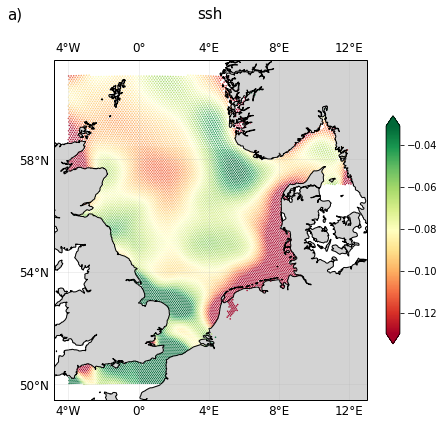

In [5]:
sl(sat).plot(cmap='RdYlGn')

We didn't specify a timestep, so the first time step gets automatically selected. Also the color-range was automatically selected based on the standard-deviation of the data. Here is another example for a global grid. We set land to False, increase the plot size and specify the ranges.

plot  ['trend']
shape:  1 x 1


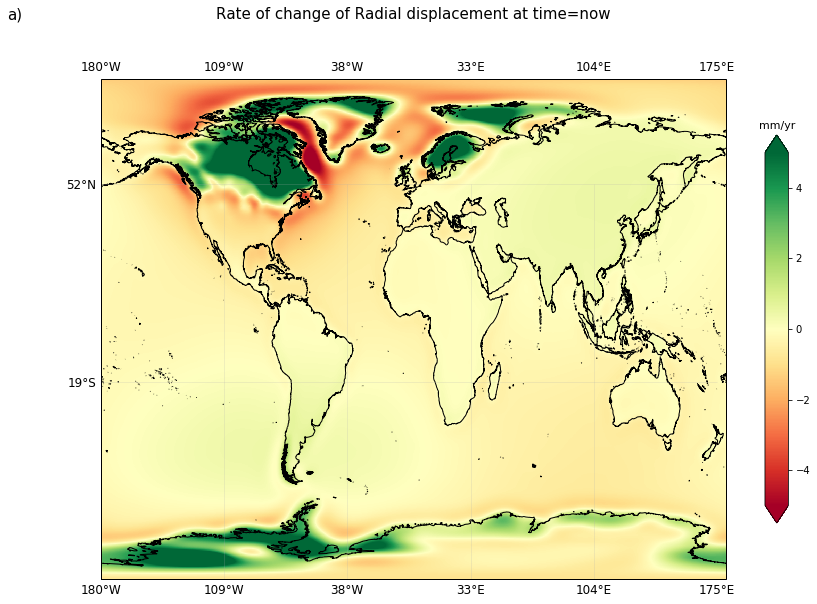

In [10]:
sl(gia).plot(cmap='RdYlGn',land=False,f_x=2.,f_y=1.7,ranges=[[-5.,5.]])

Overlays can be plotted with list inputs. We also set the maximum extend of the plot:

plot  ['trend', 'trend']
shape:  1 x 1


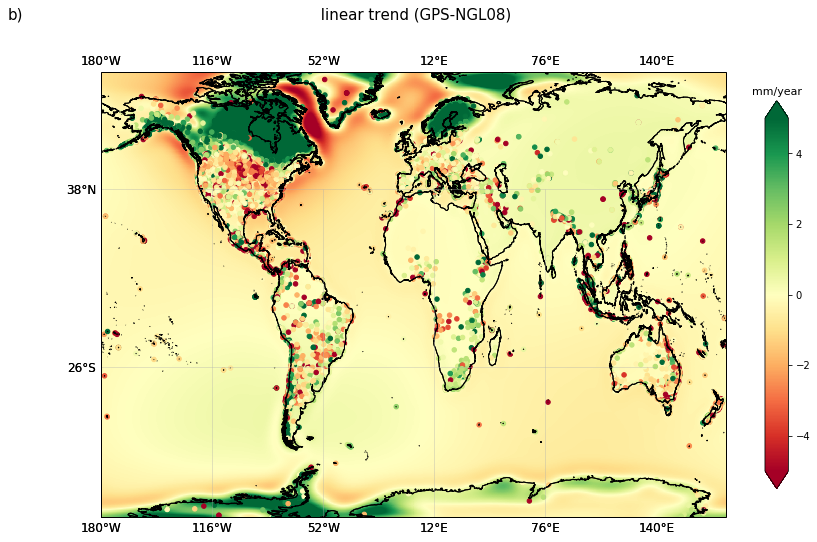

In [21]:
sl([gia,gnss]).plot(var='trend',cmap='RdYlGn',msize=20.,extend=[-180,180,-80,80],
                    land=False,f_x=2.,f_y=1.7,ranges=[[-5.,5.]])

We can also plot different variables of a dataset: 

plot  ['trend', 'trend_un']
shape:  2 x 2


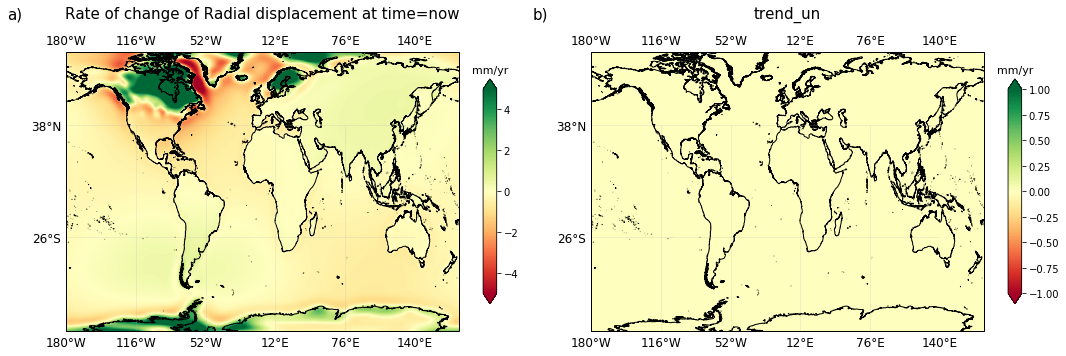

In [26]:
sl(gia).plot(var=['trend','trend_un'],cmap='RdYlGn',extend=[-180,180,-80,80],
                    land=False,f_x=1.3,ranges=[[-5.,5.],[-1.,1.]])

### <b id="-Spatial-manipulations">Spatial manipulations</b> <a href="#top">[back to top]</a>

sl.box() <br>
sl.couple() <br>
sl.remap() <br>
sl.radial_smoothing() <br>

select a lonlat box with sl.box():

plot  ['trend']
shape:  1 x 1


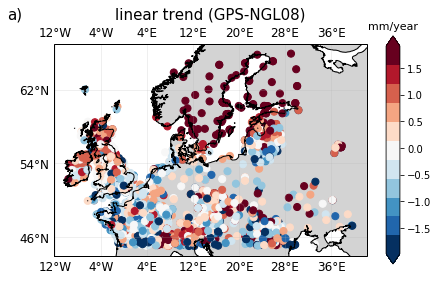

In [6]:
sl(gnss).box([-10,40,45,66]).plot(msize=50.)

Say we have to differently distributed observations: TGs and GNSS data

auto-select first variable  sla
plot  ['trend', 'trend']
shape:  1 x 1


/home/oelsmann/Julius/Scripts/sealeveltools/sealeveltools/sl_plots.py:233: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(xp,yp,ii,projection=proj)


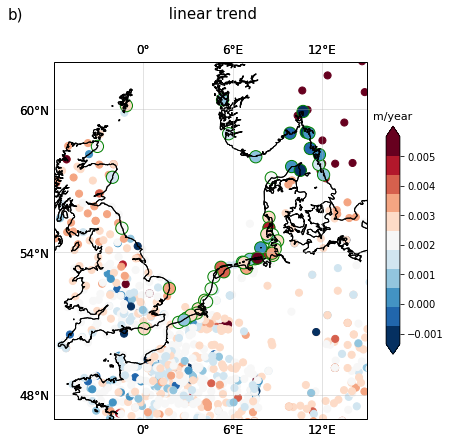

In [34]:
sl([gnss,sl(tg).trend().data]).plot(var=['trend','trend'],extend=[-6,15,47,62],
           land=False,msize=[50.,150.],edgecolors=[None,'g'])

Here, TGs are marked with greend edges. Use sl.couple() to combine data in time and space:

auto-select first variable  sla
swap
nearest
trend
50.0
plot  ['no_var', 'no_var']
shape:  2 x 2
multi
multi
nearest trend in 50.0 km


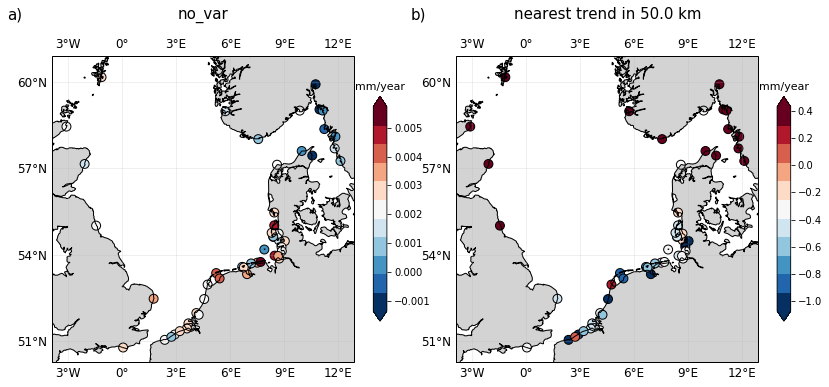

In [35]:
tg_coupled, gnss_coupled =sl(tg).trend().couple(gnss, s_method='nearest',limit=50.)
sl([[tg_coupled.data],[gnss_coupled.data]]).plot(var='no_var',msize=80., edgecolors='k')

The figure shows (a) TGs and (b) GNSS data, which are mapped onto the location of the TG. Please forget about the erroneous units =). 

- s_method: Operator to couple data, use 'nearest', 'median' or 'mean'
- limit: maximal distance where data is taken into account in km

### Remapping or smoothing

There are some remapping functions, as a simple regridding option (interpolation method stems from scipy.interpolate.griddata). Just, set the lonlat grid spacing:

plot  ['trend']
shape:  1 x 1


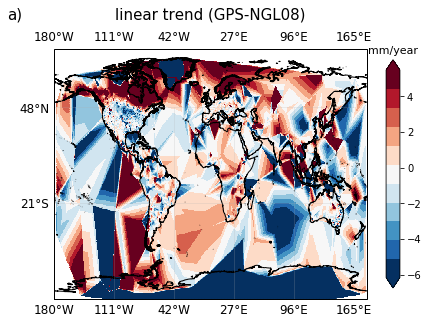

In [37]:
sl(gnss).remap(grid_size=.5).plot(land=False)

As you can see, such interpolation makes no sense in the case of very unevenly distributed datasets. Therefore, another option is included (s_method = 'sfltr'), which is a radial smoothing filter. It also takes into account the uncertainty of the single point estimates:

no time
no time
plot  ['trend']
shape:  1 x 1


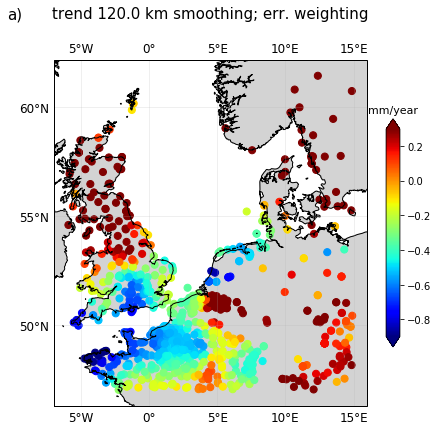

In [40]:
sl(gnss).box([-6,15,47,62]).remap(s_method='sfltr',limit=120.,stdon=True).plot(var='trend',msize=50.,cmap='jet')

limit controls here the radius and stdon = True activates uncertainty-based weighting.

### <b id="-Operators">Operators</b> <a href="#top">[back to top]</a>


While xr/pandas already provide many standard math-operations (mean, std ...), the class sl() adds some more, in geosciences very commonly used functions, such as trend and correlations analysis. These operations can be applied to 3D data-arrays and also be arbitrarily combined. All functions, which combine two differently structured datasets, use also the functionalities of sl.couple() to match them.

#### basic math: <br>
sl().__add__() <br>
sl().__sub__() <br>
sl().__mul__() <br>
sl().__truediv__() <br>

#### advanced statistics: <br>
    
sl().trend() <br>
sl().detrend() <br>
sl().cor() <br>
sl().rms() <br>
sl().regress() <br>
sl().eof() <br>


Let's start with trend computation!

In [5]:
sl(tg).trend()

auto-select first variable  sla


<xarray.Dataset>
Dimensions:       (x: 52)
Coordinates:
    lat           (x) float64 ...
    index         (x) int64 ...
    lon           (x) float64 ...
    name          (x) object ...
Dimensions without coordinates: x
Data variables:
    trend         (x) float64 0.0006193 0.002263 ... 0.0005499 -0.0008737
    trend_un      (x) float64 0.002297 0.000819 0.0005381 ... 0.001341 0.001031
    trend_un_AR1  (x) float64 0.003696 0.001717 0.001354 ... 0.00218 0.002007
    AC            (x) float64 0.1078 0.07684 0.06201 ... 0.08198 0.07877 0.07941
    AC_unc        (x) float64 0.02253 0.008317 0.005531 ... 0.01369 0.01047
    offset        (x) float64 7.084 6.946 7.009 6.966 ... 7.004 7.072 6.988
    acos          (x) float64 0.09158 0.06387 0.04413 ... 0.0335 0.03821 0.04068
    asin          (x) float64 -0.05687 -0.04271 -0.04355 ... -0.06888 -0.0682
    phase         (x) float64 148.2 146.2 135.4 129.0 ... 114.1 119.0 120.8

Returns a dataset containing different properties of the time series, such as trend the annual cycle and uncertainties ... The standard fitting method is 'leastsq', other options can be set with how='MLE', or how='kendall', which sets maximum likelihood estimation or a non-parametric trend fit.

There are many other options available, such as setting the minimum amount of required samples, or fitting the seasonal component month-wise (no sinusoidal combinations). We also insert a filter (median absolute deviation filter, also available how='std'):

In [6]:
sl(tg).fltr(how='MAD',mod1=3).trend(how='leastsq',min_samples=100.,monthly=True)

auto-select first variable  sla


<xarray.Dataset>
Dimensions:       (x: 52)
Coordinates:
    lat           (x) float64 ...
    index         (x) int64 ...
    lon           (x) float64 ...
    name          (x) object ...
Dimensions without coordinates: x
Data variables:
    trend         (x) float64 0.0006597 0.00228 ... 0.0005688 -0.0008435
    trend_un      (x) float64 0.002286 0.0008043 0.0005215 ... 0.001319 0.001016
    trend_un_AR1  (x) float64 0.1042 0.04954 0.0391 ... 0.06513 0.06249 0.05727
    AC            (x) float64 0.1327 0.07867 0.06626 ... 0.09129 0.08646 0.08555
    AC_unc        (x) float64 0.04581 0.01655 0.01089 ... 0.0266 0.02747 0.02123
    offset        (x) float64 11.0 11.0 10.0 10.0 10.0 ... 11.0 9.0 9.0 11.0 9.0
    acos          (x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    asin          (x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    phase         (x) float64 3.0 3.0 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0 3.0

#### Correlate data

xr.corr() function can only correlate equally sized DataArrays. The function sl().cor() automatically matches data in time and space for correlation computation.
In this example we compute point-wise correlations of annual sl-anomalies with the winter (DJF) NAO and AO index:


correlate multiple columns
NAO-DJF
(12844,)
EA-DJF
(12844,)
plot  ['ssh_cor_NAO-DJF', 'ssh_cor_EA-DJF']
shape:  2 x 2


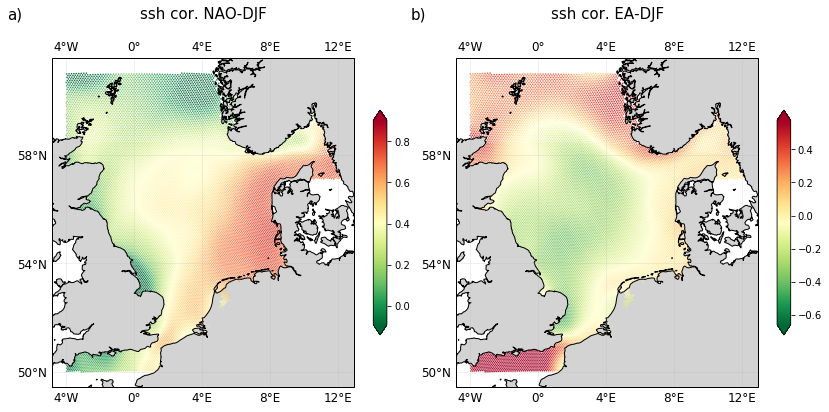

In [37]:
sl(sl(sat).seasmean(seas='DJF').cor(sl(ci[['NAO','EA']]).seasmean(seas='DJF'))).plot(var='all_',cmap='RdYlGn_r')

In the above example, we compared a pd.DataFrame with an xr.DataArray. We also applied a time-operator to only select the winter periods. Similarly, TG time series are automatically matched to the altimetry data:

swap
(52,)
plot  ['no_var']
shape:  1 x 1


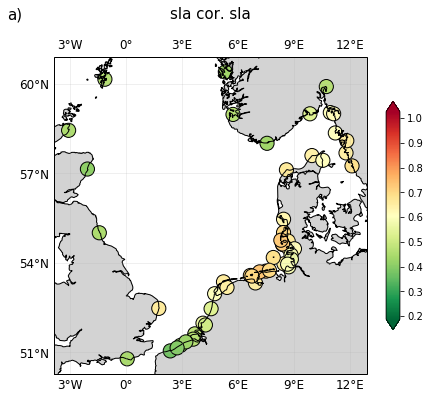

In [3]:
sl(tg['sla']).fltr(how='MAD',mod1=3).detrend(trend_only=True).cor(sat['ssh']).plot(msize=200.,edgecolors=['k'],cmap='RdYlGn_r')

#### Empirical Orthogonal Functions

The sl-package includes the functionalities of the subpackage eofs:
https://pypi.org/project/eofs/

sl().eof() returns a dictionary containing of:

- 'eof_pattern': EOF-pattern of the first 6 modes (default), as a sl()-type object
- 'pcs': The time series/Principle components
- 'solver': The solver object of eofs

plot  ['1. eof', '2. eof', '3. eof', '4. eof', '5. eof', '6. eof']
shape:  3 x 2


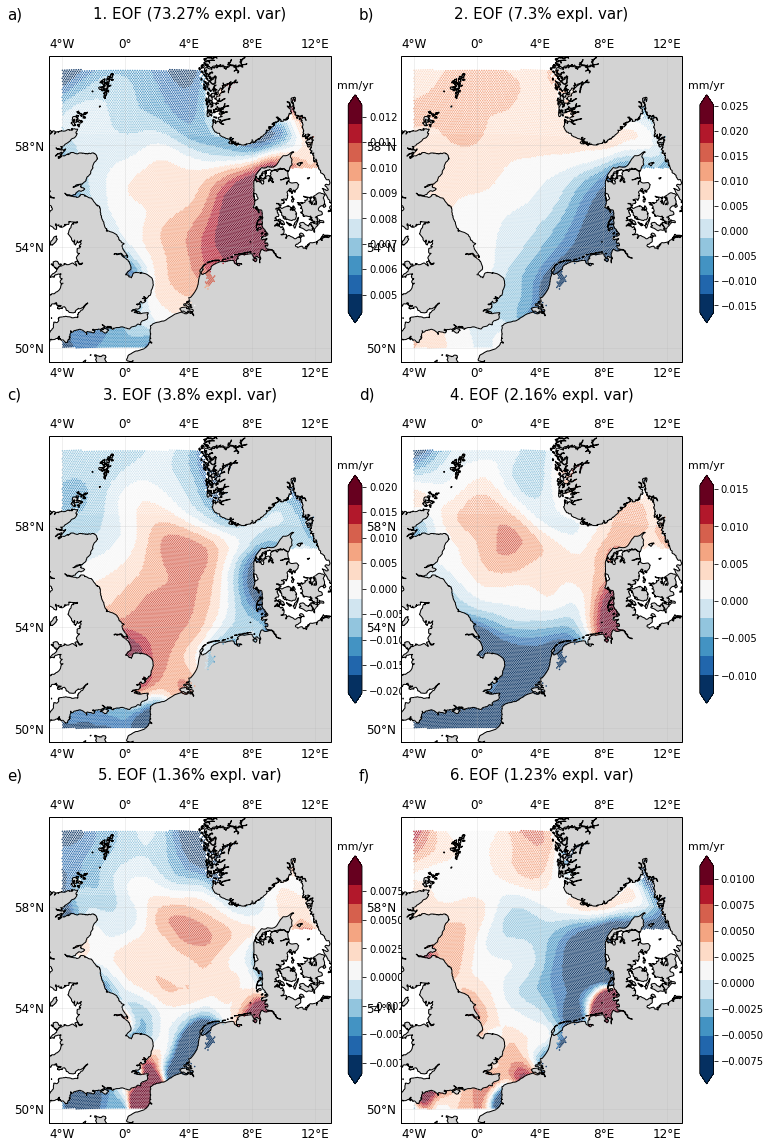

In [36]:
sl(sat['ssh']).eof()['eof_pattern'].plot(var='all_',f_x=0.6)

### <b id="-Time-operators">Time operators</b> <a href="#top">[back to top]</a>


time-operators: <br>

sl().timavg() <br>
sl().yearmean() <br>
sl().yearmon() <br>
sl().monmean() <br>
sl().seasmean() <br>
sl().selmon() <br>

Most of these functions are self-explanatory (e.g. timavg is the time average, yearmean computes annual means ... etc.)

In [43]:
sl(sat).seasmean(seas='MAM')

<xarray.DataArray 'ssh' (time: 24, x: 12844)>
array([[ 0.08464034, -0.13841611, -0.13483406, ..., -0.03306944,
        -0.04179113, -0.0372217 ],
       [-0.83196875, -0.19059356, -0.16834155, ..., -0.12541122,
        -0.11696666, -0.12067367],
       [-0.74039322, -0.13202124, -0.12439247, ..., -0.15376719,
        -0.14247246, -0.14665196],
       ...,
       [-0.45399112, -0.10228183, -0.08060839, ..., -0.05180392,
        -0.05228399, -0.05135394],
       [-0.47211961, -0.02987944, -0.01818404, ..., -0.06533872,
        -0.04923797, -0.05661958],
       [-0.0803679 ,  0.00770531,  0.01509782, ..., -0.03362571,
        -0.03027549, -0.03226205]])
Coordinates:
  * time     (time) datetime64[ns] 1995-12-31 1996-12-31 ... 2018-12-31
    lat      (x) float64 60.97 60.93 60.94 60.95 ... 50.04 50.04 50.04 50.04
    lon      (x) float64 7.029 5.129 4.985 4.698 ... 0.1696 -0.05653 0.05653
Dimensions without coordinates: x

When using seasmean, the date is always set to the last day of the year of the respective season.

The function sl.monmean() computes a mean for every month over the full period of observation. 

In [44]:
sl(sat).monmean()

<xarray.Dataset>
Dimensions:             (time: 289, x: 12844)
Coordinates:
  * time                (time) datetime64[ns] 1995-05-31 ... 2019-05-31
    lat                 (x) float64 60.97 60.93 60.94 ... 50.04 50.04 50.04
    lon                 (x) float64 7.029 5.129 4.985 ... -0.05653 0.05653
Dimensions without coordinates: x
Data variables:
    ssh                 (time, x) float64 0.08464 -0.1384 ... -0.1006 -0.106
    ssh_std             (time, x) float64 0.003859 2.406e-05 ... 2.554e-06
    sig0_fitting_error  (time, x) float64 0.5164 0.1374 0.1503 ... 0.2992 0.2967
    num_used_obs        (time, x) float64 287.0 1.844e+03 ... 3.273e+03
    num_obs             (time, x) float64 400.0 2.543e+03 ... 4.531e+03 4.46e+03
    mean_time_obs       (time, x) float64 2.0 3.0 4.0 4.0 ... 30.0 30.0 25.0

### <b id="-Custom-functions">Custom functions, miscellaneous</b> <a href="#top">[back to top]</a>

sl().zoi() <br>
sl().misc() <br>
sl(tg).misc(opt='ke_constituent') <br>

external packages:
- ...

General:

- define your own functions with xr.apply_ufunc: http://xarray.pydata.org/en/stable/generated/xarray.apply_ufunc.html

Future implementations:

- PyMc3
- TEOS-10
---

Use sl.zoi() to couple data based on correlation or rms, within a given radius. Retain either the coupled time series or the statistics:

auto-select first variable  sla
(36406,)
plot  ['no_var']
shape:  1 x 1


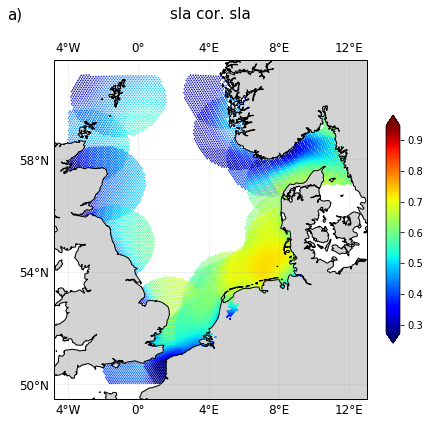

In [52]:
sl(sat).zoi(sl(tg).detrend(),output='zoi_stats',opt='cor',how='rel',limit=150.).plot(cmap='jet')

with output = 'zoi_stats', we obtain statistics within the radius

In [48]:
zoi_series=sl(sat).zoi(sl(tg).detrend(),output='zoi_series',opt='cor',how='rel',level=0.8,limit=150.)

auto-select first variable  sla
(36406,)


In [51]:
zoi_series

<xarray.DataArray 'sla' (time: 332, idx: 52)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.06001546, -0.07101759, -0.09507509, ..., -0.09277204,
        -0.02687631, -0.02541327],
       [-0.06001546, -0.07101759, -0.09507509, ..., -0.09277204,
        -0.02687631, -0.02541327],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * time      (time) datetime64[ns] 1992-01-31 1992-02-29 ... 2019-08-31
    quantile  float64 0.8
  * idx       (idx) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50 51
    lon       (idx) float64 8.383 -3.086 0.05703 3.682 ... 10.73 9.964 10.55
    lat       (idx) float64 54.62 58.44 50.78 51.62 ... 59.0 59.91 57.6 

with output = 'zoi_series' at any location of a TG a series is returned.

Other functions and integrations will be described soon!